# Análise Exploratória dos Dados

## Importando as dependências

In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

# Importação de módulos específicos do Hydra e OmegaConf
from hydra import initialize, compose
from omegaconf import OmegaConf

# Inicialização do Hydra com configuração específica
with initialize(version_base=None, config_path="../config/"):
    # Composição da configuração usando o OmegaConf
    cfg = compose(config_name='main')

Hydra: Hydra é um framework de configuração flexível para aplicações em Python. Ele permite que você organize e gerencie suas configurações de maneira hierárquica. A linha from hydra import initialize, compose importa os módulos necessários para inicializar e compor configurações usando o Hydra.

OmegaConf: OmegaConf é uma biblioteca utilizada pelo Hydra para manipulação flexível de configurações. A linha from omegaconf import OmegaConf importa a classe OmegaConf, que fornece métodos para trabalhar com configurações de forma eficiente e fácil.

## Carregando o DataSet

In [2]:
df = pd.read_csv(f"../{cfg.data.raw}")

## Formato do DataSet

In [3]:
# Informação do DataFrame e os objetos reconhecidos pelo pandas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [4]:
# Formato do DataFrame
df.shape

(5842, 2)

In [5]:
# Formato das colunas
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


### Verificando a existência de valores nulos

In [6]:
# Quantidade de valores nulos
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

Felizmente não possuímos nenhuma linha com valores ausentes.

### Verificando a existência de valores duplicados

In [7]:
# Quantidade de valores duplicados
df.duplicated().sum()

6

O dataset possui seis linhas duplicadas.

## Análise da Coluna `Sentence`

### Menor Sentença

In [8]:
# Menor quantidade de caracteres de uma senteça e seu formato
min_idx = df['Sentence'].str.len().idxmin()
min_sen = df.loc[min_idx, 'Sentence']
min_sen_length = len(min_sen)

print(f"O tamanho da menor sentença é {min_sen_length} caracteres e ela é '{min_sen}'")

O tamanho da menor sentença é 9 caracteres e ela é 'Welcome !'


### Maior sentença

In [9]:
# Menor quantidade de caracteres de uma senteça e seu formato
max_idx = df['Sentence'].str.len().idxmax()
max_sen = df.loc[max_idx, 'Sentence']
max_sen_length = len(max_sen)

print(f"O tamanho da maior sentença é {max_sen_length} caracteres e ela é '{max_sen}'")

O tamanho da maior sentença é 315 caracteres e ela é 'Supported Nokia phones include : N96 , N95-8GB , N95 , N93-N931 , N92 , N85 , N82 , N81 , N80 , N79 , N78 , N77 , N76 , N75 , N73 , N72 , N71 , E90 , E71 , E70 , E66 , E65 , E62 , E61-E61i , E60 , E51 , E50 , Touch Xpress 5800 , 6220 Classic , 6210 Navigator , 6120 Classic , 6110 Navigator , 5700 , 5500 , 5320XM .'


### Amplitude das quantidades de caracteres das sentenças

In [10]:
amp_tot = max_sen_length - min_sen_length
amp_tot

306

A amplitude total fornece uma medida da variação entre os comprimentos das sentenças no conjunto de dados. É útil para compreender o alcance dos tamanhos de sentenças e a distribuição desses tamanhos dentro do conjunto de dados.

### Distribuição dos Tamanhos

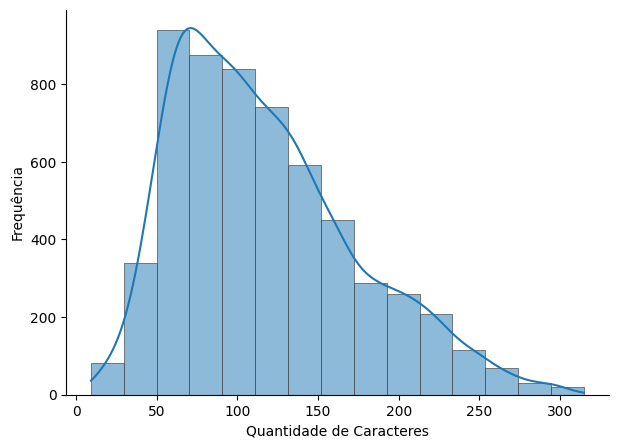

In [11]:
# Tamanho do vector coluna
size = df.size


# Número de grupos
k = math.ceil(1 + 3.3 * math.log10(size))

# Amplitude de cada classe
amp = amp_tot / k

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.set_style("whitegrid")

df['Tamanho'] = df['Sentence'].str.len()

sns.histplot(
    df,
    x="Tamanho",
    bins=k,
    binwidth=amp,
    edgecolor=".3",
    linewidth=.5,
    kde=True,
)


ax.set_ylabel("Frequência")
ax.set_xlabel("Quantidade de Caracteres")

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

### Nuvem de palavras mais frequentes


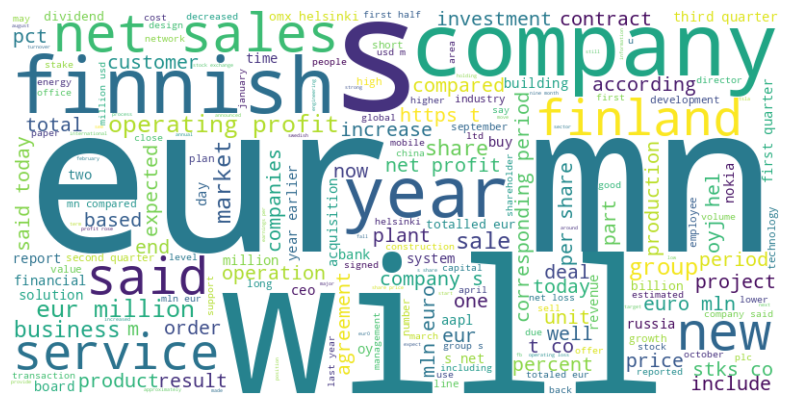

In [12]:
from wordcloud import WordCloud

# Palavras mais frequentes sem pré-processamento

# Deixar todas as palavras em lower case
lower_words = [word.lower() for word in df['Sentence']]

# Juntar todas as palavras em uma única string
text = " ".join(lower_words)

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Análise da Coluna `Sentiment`

### Valores da variável categórica Sentimentos

In [13]:
df['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

O resultado desta operação é uma série que mostra quantas vezes cada valor único (provavelmente representando diferentes sentimentos) aparece na coluna 'Sentiment'. Isso pode ser útil para entender a distribuição dos diferentes sentimentos dentro do conjunto de dados.

### Visualização da frequência das categorias

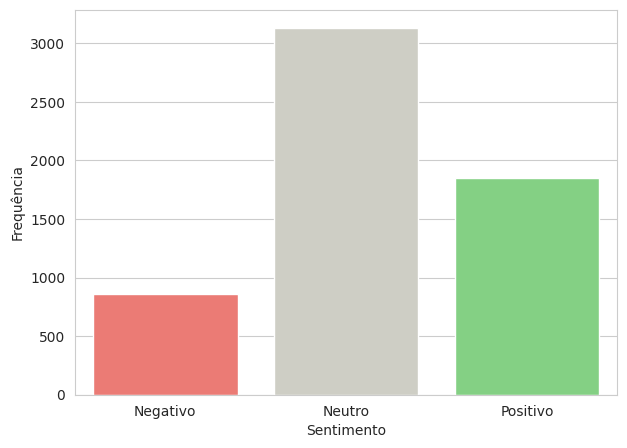

In [14]:
order = ['negative', 'neutral', 'positive']
palette = ['#ff6961', '#cfcfc4', '#77dd77']
labels = {'negative': 'Negativo', 'neutral': 'Neutro', 'positive': 'Positivo'}

plt.figure(figsize=(7, 5))

sns.set_style("whitegrid")

sns.countplot(
    data=df,
    x="Sentiment",
    order=order,
    palette=palette
)

plt.xticks(range(len(order)), [labels[x] for x in order])
plt.xlabel("Sentimento")
plt.ylabel("Frequência")

plt.show()